# 9.1.5 多维


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2



In [ ]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)


In [ ]:
# generates 2-d grids out of the 1-d arrays
Z = fm(X, Y)
x = X.flatten()
y = Y.flatten()
# yields 1-d arrays from the 2-d grid



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)



In [12]:
# 编辑奇函数
matrix = np.zeros((len(x), 6+1))
matrix[:,6] = np.sqrt(y)
matrix[:,5] = np.sin(x)
matrix[:,4] = y ** 2
matrix[:,3] = x ** 2
matrix[:,2] = y
matrix[:,1] = x
matrix[:,0] = 1



In [15]:
import statsmodels.api as sm
model = sm.OLS(fm(x,y), matrix).fit()


In [17]:
model.rsquared

1.0

In [22]:
a = model.params
a

array([ 7.02216063e-15,  2.50000000e-01, -1.33226763e-15, -3.85108612e-16,
        5.00000000e-02,  1.00000000e+00,  1.00000000e+00])

In [23]:
def reg_func(a, x, y):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)


In [25]:
RZ = reg_func(a, X, Y)

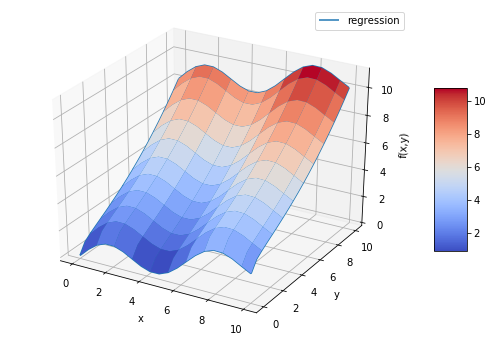

In [26]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
